In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns

In [2]:
def n_inf(c,moe,p=0.5):
    
    z = stats.norm.ppf(1-(1-c)/2)
    
    return (z/moe)**2*p*(1-p)

def n(N, n_inf):
    return n_inf/(1+(n_inf-1)/N)

In [3]:
n_inf(0.99,0.05)

663.4896601021213

In [4]:
n(1000, n_inf(0.99,0.05))

399.0940070336229

In [5]:
logrange = sorted([a*b for a in [10,20,30,50,75] for b in [10,100,1000,10000,100000,1000000]])     

In [6]:
data = [(N, n(N, n_inf(0.95,0.05)), n(N, n_inf(0.95,0.035))) for N in logrange]

In [7]:
df=pd.DataFrame(data, columns=["N", "5%", "3.5%"])

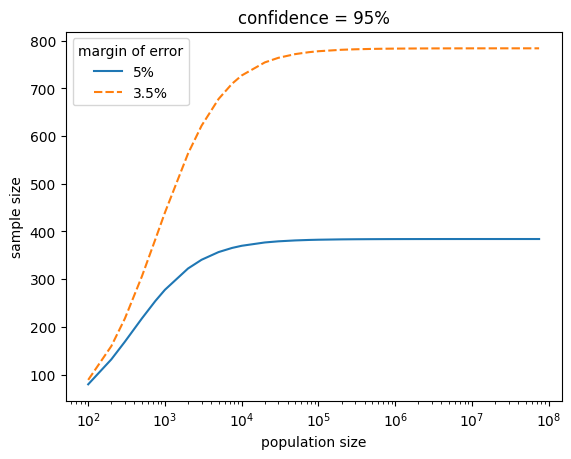

In [8]:
plot=sns.lineplot(df.set_index(["N"]))
plot.set(xscale='log')
plot.set(title="confidence = 95%")
plot.set(xlabel="population size")
plot.set(ylabel="sample size")
plot.legend_.set(title="margin of error")
plot;

In [22]:
data = [(N, n(N, n_inf(0.99,0.05)), n(N, n_inf(0.99,0.035))) for N in logrange]

In [23]:
df=pd.DataFrame(data, columns=["N", "5%", "3.5%"])

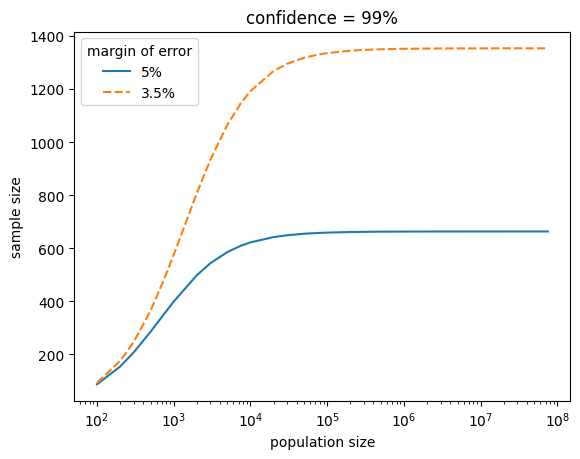

In [24]:
plot=sns.lineplot(df.set_index(["N"]))
plot.set(xscale='log')
plot.set(title="confidence = 99%")
plot.set(xlabel="population size")
plot.set(ylabel="sample size")
plot.legend_.set(title="margin of error")
plot;

In [40]:
data = [(N, n(N, n_inf(0.95,0.05)), n(N, n_inf(0.95,0.035)), n(N, n_inf(0.95,0.01))) for N in logrange]
df=pd.DataFrame(data, columns=["N", "5%", "3.5%", "1.0"])

df_relative = df.divide(df.N, axis="index")
df_relative.N=df.N

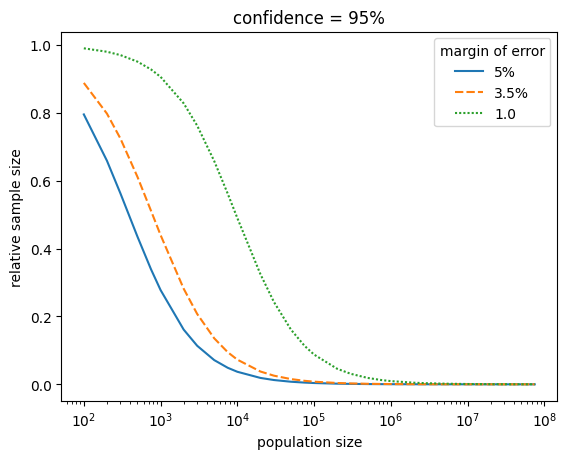

In [46]:
plot = sns.lineplot(df_relative.set_index(["N"]))
plot.set(xscale="log")
plot.set(title="confidence = 95%")
plot.set(xlabel="population size")
plot.set(ylabel="relative sample size")
plot.legend_.set(title="margin of error")
plot;